In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Changing display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', palette='muted')

# Loading dataset
file_path = r'C:\Users\werle\Desktop\Python_Projects\capstone-housing\data\raw\kc_house_data.csv'
df = pd.read_csv(file_path)

# Basic structure
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [2]:
# Overview of data types, nulls, and summary
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [3]:
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values per column:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Duplicate rows: 0


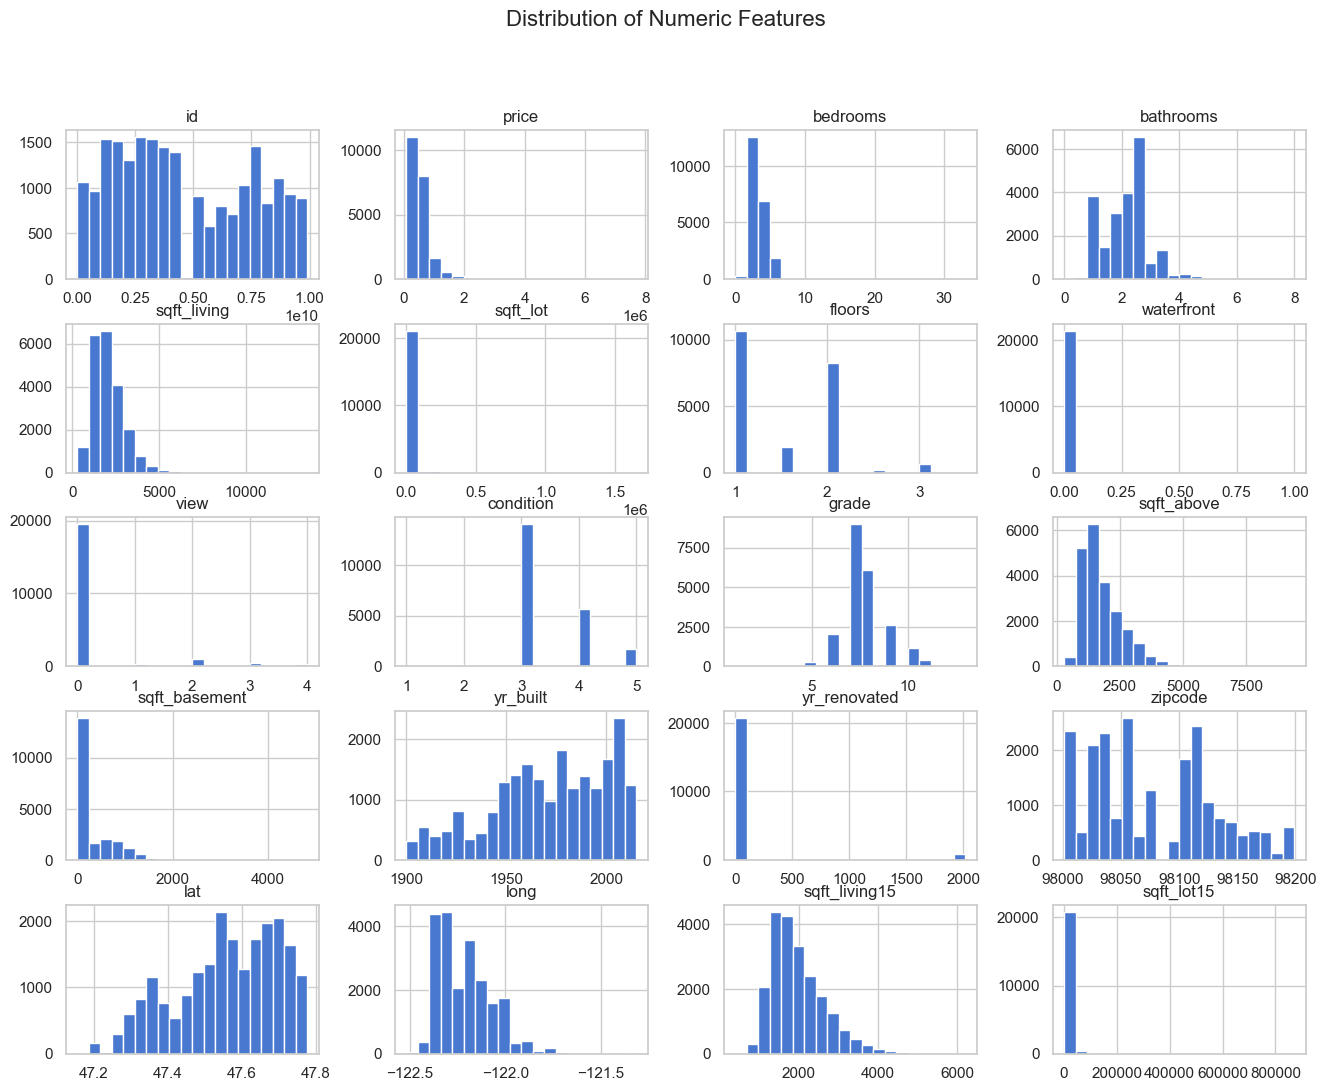

In [4]:
# Histograms for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=20, figsize=(16, 12))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

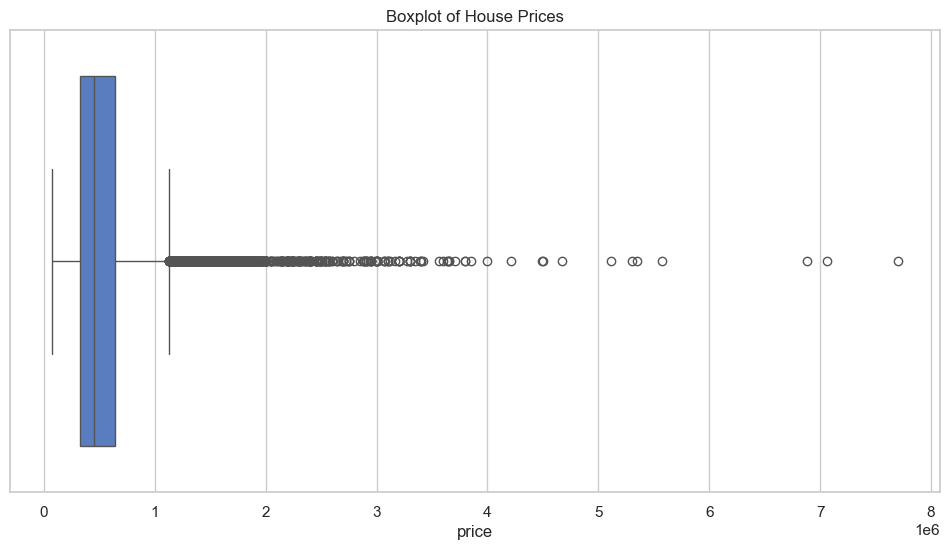

In [5]:
# Boxplots to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of House Prices')
plt.show()

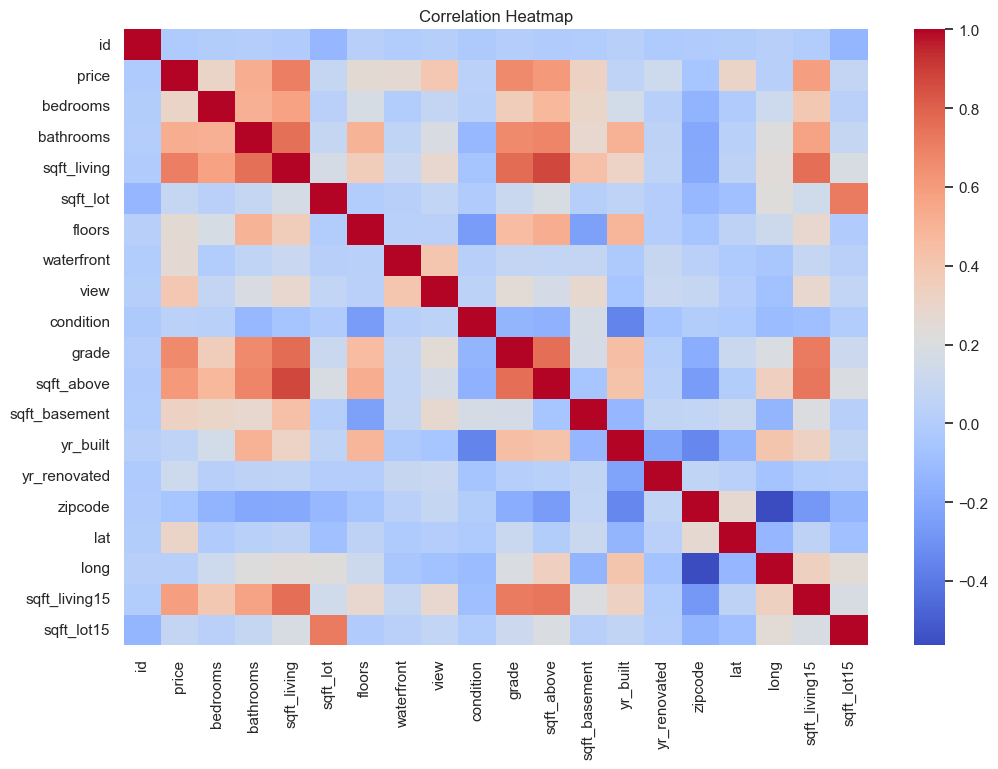

price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.53
view            0.40
sqft_basement   0.32
bedrooms        0.31
lat             0.31
Name: price, dtype: float64

In [6]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Sort by correlation with Price
corr_target = corr['price'].sort_values(ascending=False)
corr_target.head(10)

In [ ]:
# sqft_living, grade, sqft_above, sqft_living15, and bathrooms have the greatest correlation to price.

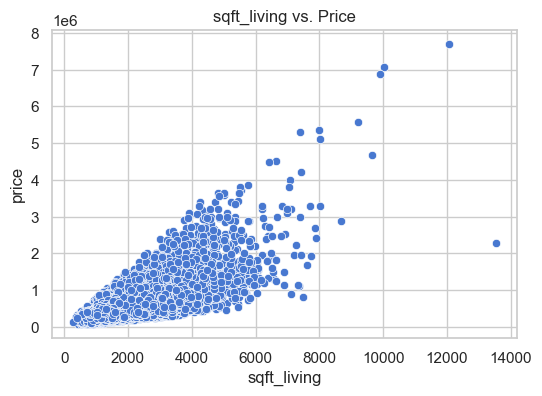

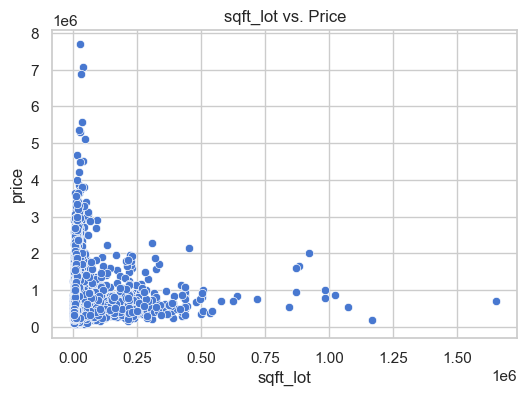

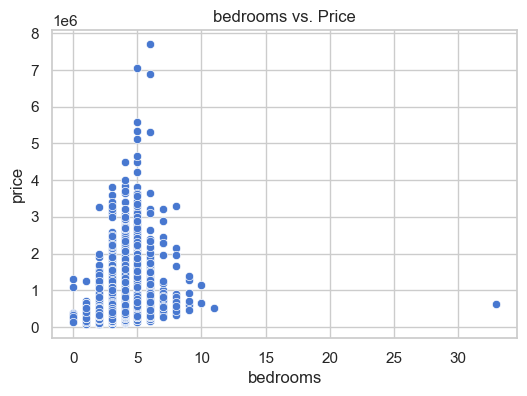

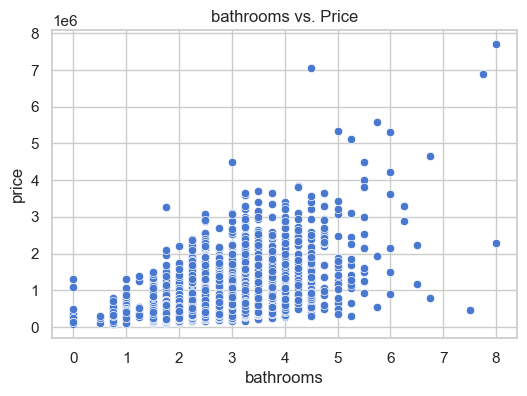

In [7]:
key_features = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

for col in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs. Price')
    plt.show()

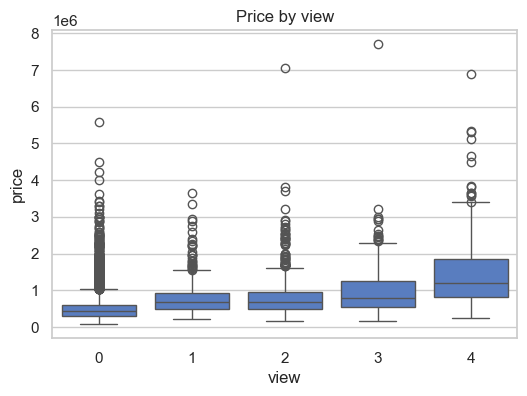

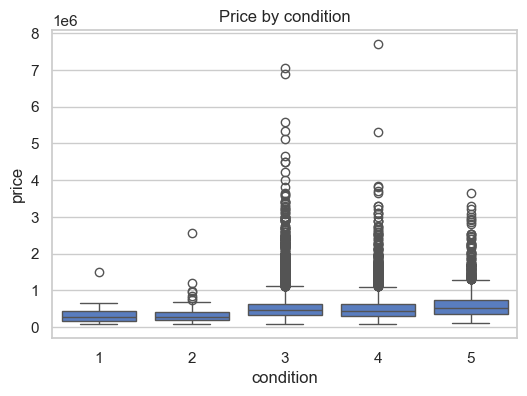

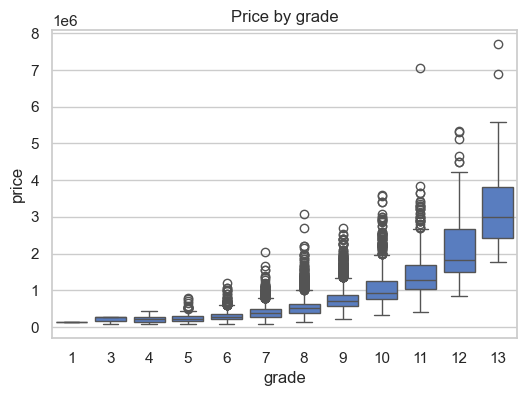

In [8]:
cat_features = ['view', 'condition', 'grade']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price by {col}')
    plt.show()


In [9]:
# Inferential Hypothesis:
# H0: There is no correlation between sqft_living and price.
# H1: There is a significant positve correlation between sqft_living and price.
from scipy.stats import pearsonr

r, p = pearsonr(df['sqft_living'], df['price'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p:.3e}")

Pearson correlation: r = 0.702, p-value = 0.000e+00


In [ ]:
# Reject H0, there is a statistically significant relationship. 

In [10]:
r, p = pearsonr(df['grade'], df['price'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p:.3e}")

Pearson correlation: r = 0.667, p-value = 0.000e+00


In [11]:
r, p = pearsonr(df['sqft_above'], df['price'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p:.3e}")

Pearson correlation: r = 0.606, p-value = 0.000e+00


In [12]:
r, p = pearsonr(df['sqft_living15'], df['price'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p:.3e}")

Pearson correlation: r = 0.585, p-value = 0.000e+00


In [13]:
r, p = pearsonr(df['bathrooms'], df['price'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p:.3e}")

Pearson correlation: r = 0.525, p-value = 0.000e+00


In [14]:
# Check for skewed numeric features
df[numeric_cols].skew().sort_values(ascending=False).head(10)

# Example log transform on skewed features
df['log_price'] = np.log1p(df['price'])
df['log_sqft_living'] = np.log1p(df['sqft_living'])


In [15]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['view', 'condition', 'grade'], drop_first=True)


In [16]:
selected_features = corr_target[corr_target > 0.2].index.tolist()
selected_features


['price',
 'sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat',
 'waterfront',
 'floors']

In [18]:
# Summary
# Strong predictors: sqft features (sqft_living, sqft_above, sqft_living15), grade, bathrooms
# Moderate predictors: view, sqft_basement, bedrooms, lat
# Weak predictors: sqft_loft, zip

# Price is right-skewed
# Outliers in price and living area
# Lat appears correlation - could help isolate location of higher/lower value areas.